<a href="https://colab.research.google.com/github/mgnarag/machine-learning/blob/main/Unet_512_whole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/CS284/Project/"

 1872_Mindanao_NAP_D.FedericoCaballero.tif
 1885_Mactan_NAP_FelixPelayo.tiff
 201464423-23022858-PaymentSlip.pdf
 313490484_646790150357239_663796780442369775_n.jpg
 361079911_248325231393045_2145216296096417082_n.jpg
'Applied Physics 184 FX-2'
 Architectural_designs
 autoencoder_32
'autoencoder_32 (1)'
 autoencoder_64
'Baumgartner screenshots'
'BS Applied Physics'
 Classroom
'CLEAN128_TEST_INPUT_[04] Coming into Bloom.png'
'CLEAN_[WB] 1872_Mindanao_NAP_D (1).FedericoCaballero.tif'
'CLEAN_[WB] 1872_Mindanao_NAP_D (2).FedericoCaballero.tif'
'CLEAN_[WB] 1872_Mindanao_NAP_D (3).FedericoCaballero.tif'
'CLEAN_[WB] 1872_Mindanao_NAP_D.FedericoCaballero.tif'
'CNN scores.gsheet'
'Colab Notebooks'
'CONSENT_NARAG_MARK JEREMY_G.pdf'
 CONSENT_NARAG_MARKJEREMY_G.pdf
 CS284
'Dorm bill.png'
 Fast-Dreambooth
'fingerprint (1).pb'
'fingerprint (2).pb'
'fingerprint (3).pb'
 fingerprint.pb
 FN.png
 FP.png
 GAN
'Geology (Ate Grass)'
'Getting started.pdf'
 image.jpg
 IMG_5032.jpeg
 IMG_6546.PNG
'IMG_9359 (1

In [3]:
import time
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from PIL import Image, ImageOps
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

import cv2

epoch = 100
model_number = 512
size = 512


# Generate augmented images with specific rotations
#zoom_factor = [x/5 for x in range(6, 8)]
zoom_factor = [2.0, 3.0, 4.0]


def zoom_and_resize(img, zoom_factor):
    height, width = img.shape[:2]

    # Calculate the region to crop around the center
    crop_top = int((height - height / zoom_factor) / 2)
    crop_bottom = int(height - crop_top)
    crop_left = int((width - width / zoom_factor) / 2)
    crop_right = int(width - crop_left)
    # Crop the image
    cropped_image = img[crop_top:crop_bottom, crop_left:crop_right]
    # Resize the zoomed image back to the original dimensions
    resized_image = cv2.resize(cropped_image, (width, height))

    return resized_image

def crop(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,0.75):
        for i in np.arange(0,int(width/size)+1,0.75):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            #im1 = im1/255
            data.append(im1/255)
            #flip_im1 = np.fliplr(im1)

            rotated_90 = np.rot90(im1)
            data.append(rotated_90/255)
            rotated_90 = np.rot90(rotated_90) #180
            data.append(rotated_90/255)
            rotated_90 = np.rot90(rotated_90) #270
            data.append(rotated_90/255)
            #flip
            #rotated_90 = np.rot90(flip_im1)
            #data.append(rotated_90/255)
            #rotated_90 = np.rot90(rotated_90) #180
            #data.append(rotated_90/255)
            #rotated_90 = np.rot90(rotated_90) #270
            #data.append(rotated_90/255)


            # Define the zoom factor (e.g., 1.2 for 20% zoom in)
            for z in zoom_factor:
                zoomed_img = zoom_and_resize(im1, z)
                data.append(zoomed_img/255)



    return data

data = []

input = np.array(crop(Image.open(file_path + "WB_ViganII_NAP.tif").convert('RGB')))
print("Done reading the input of size = ", input.shape)

output = np.array(crop(Image.open(file_path + "CLEAN_ViganII_NAP.png").convert('RGB')))
print("Done reading the output of size = ", input.shape)

train_input = []
test_input = []
for i in range(0,len(input)):
    if i % 4 == 0:
        test_input.append(input[i])
    else:
        train_input.append(input[i])

train_input = np.array(train_input)
test_input = np.array(test_input)

print("Done reading the train input of size = ", train_input.shape)
print("Done reading the test input of size = ", test_input.shape)
input = []

train_output = []
test_output = []
for i in range(0,len(output)):
    if i % 4 == 0:
        test_output.append(output[i])
    else:
        train_output.append(output[i])

train_output = np.array(train_output)
test_output = np.array(test_output)

print("Done reading the train output of size = ", train_input.shape)
print("Done reading the test output of size = ", test_input.shape)

output = []


Done reading the input of size =  (1995, 512, 512, 3)
Done reading the output of size =  (1995, 512, 512, 3)
Done reading the train input of size =  (1496, 512, 512, 3)
Done reading the test input of size =  (499, 512, 512, 3)
Done reading the train output of size =  (1496, 512, 512, 3)
Done reading the test output of size =  (499, 512, 512, 3)


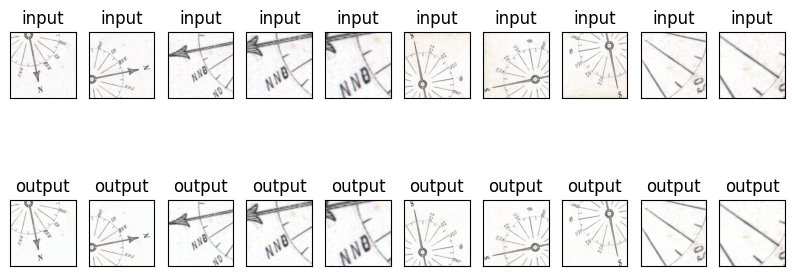

In [4]:

n = 10
plt.figure(figsize=(10, 4))
for i in range(0,10):

    ax = plt.subplot(2, n, i + 1)


    plt.title("input")
    plt.imshow((train_input[i+100]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+100]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()



In [5]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization
from tensorflow.keras import layers, losses
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def unet_model(input_shape=(512, 512, 3)):
    inputs = Input(input_shape)

    # Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    #conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    #conv1 = BatchNormalization()(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', strides = 2)(conv1)
    #conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    #conv2 = BatchNormalization()(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', strides = 2)(conv2)
    #conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    #conv3 = BatchNormalization()(conv3)

    conv6 = concatenate([Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same')(conv3), conv2], axis = -1)
    #conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)
    #conv6 = BatchNormalization()(conv6)

    conv7 = concatenate([Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same')(conv6), conv1], axis = -1)
    #conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)
    #conv7 = BatchNormalization()(conv7)

    # Output Layer
    output = Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv7)

    model = Model(inputs=inputs, outputs=output)
    return model

# Usage example:
unet = unet_model()
unet.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 256, 256, 128)        73856     ['conv2d_1[0][0]']            
                                                                                              

In [6]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
unet.compile(optimizer=opt, loss=losses.MeanSquaredError())
start = time.time()
model = unet.fit(train_input, train_output,
                epochs=epoch,
                shuffle=True,
                validation_data=(test_input, test_output),batch_size=16)

# record end time
end = time.time()

print("The time of execution of above program is :",
      (end-start), "seconds")

unet.save(file_path + 'unet_' + str(model_number)+"_whole")

loss = model.history['loss']
loss = pd.DataFrame(loss)
loss.to_csv(file_path + 'loss_'+ str(model_number)+"_whole" + '.csv')
val_loss = model.history['val_loss']
val_loss = pd.DataFrame(val_loss)
val_loss.to_csv(file_path  +'val_loss_'+ str(model_number) +"_whole"+ '.csv')


Epoch 1/100
94/94 [==============================] - 73s 475ms/step - loss: 0.0663 - val_loss: 0.0358
Epoch 2/100
94/94 [==============================] - 27s 284ms/step - loss: 0.0058 - val_loss: 0.0017
Epoch 3/100
94/94 [==============================] - 27s 283ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 4/100
94/94 [==============================] - 27s 283ms/step - loss: 0.0010 - val_loss: 7.6800e-04
Epoch 5/100
94/94 [==============================] - 27s 284ms/step - loss: 8.7868e-04 - val_loss: 7.1361e-04
Epoch 6/100
94/94 [==============================] - 27s 283ms/step - loss: 7.6262e-04 - val_loss: 7.8377e-04
Epoch 7/100
94/94 [==============================] - 27s 284ms/step - loss: 6.7522e-04 - val_loss: 6.7245e-04
Epoch 8/100
94/94 [==============================] - 27s 283ms/step - loss: 5.6508e-04 - val_loss: 5.0294e-04
Epoch 9/100
94/94 [==============================] - 27s 283ms/step - loss: 6.0814e-04 - val_loss: 6.3340e-04
Epoch 10/100
94/94 [==================

In [ ]:
from tensorflow import keras
from PIL import Image, ImageOps
import numpy as np
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 236958876

n_size = 64
def crop_(im):
    width, height = im.size
    data = []
    for j in range(0,int(height/n_size)):
        for i in range(0,int(width/n_size)):
            im1 = im.crop((0 + (n_size*i), 0 + (n_size*j), n_size + (n_size*i), n_size + (n_size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data


#filename = str('[WB] 1885_Mactan_NAP_FelixPelayo.png')
#filename = str("1885_Mactan_NAP_FelixPelayo.tiff")
#filename = str("[WB] 1872_Mindanao_NAP_D.FedericoCaballero.tif")
#filename = str("[WB] XXXX_Cagayan y Ilocos_online.png")
filename = str("[WB] XXXX_Manila_NAP_Hoja2.tiff")
test = Image.open(file_path+ "Testing nbs/" + filename)
test = test.convert('RGB')
w_dirty, h_dirty = test.size


autoencoder = keras.models.load_model(file_path + 'unet_64_whole')


xx = int(w_dirty/n_size)
final=[]

for portion in range(0,xx):
    im1 = test.crop((n_size*portion, 0, (n_size*portion) + n_size, h_dirty))
    w1, h1 = im1.size
    w = int(w1/n_size)
    h = int(h1/n_size)

    neverbeforeseen = np.array(crop_(im1))
    #encoded_imgs = autoencoder.encoder(neverbeforeseen).numpy()
    decoded_imgs = autoencoder.predict(neverbeforeseen)

    col = np.vstack((decoded_imgs[0],decoded_imgs[1]))
    for i in range(2,h):
        col = np.vstack((col,decoded_imgs[i]))

    #y = np.where(col > 0.5,1,0) #round the values
    y= col
    y = (y * 255).astype('uint8')
    if portion == 0:
        final = y
    if portion > 0:
        final = np.hstack((final,y))

final = np.squeeze(final)
reconstructed = Image.fromarray(final)
reconstructed.save(file_path + "Testing nbs/"+"CLEAN_"+filename)

7/7 [==============================] - 0s 19ms/step


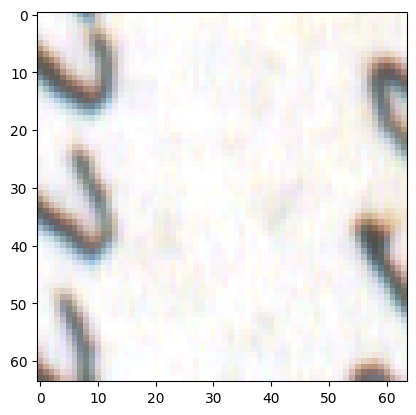

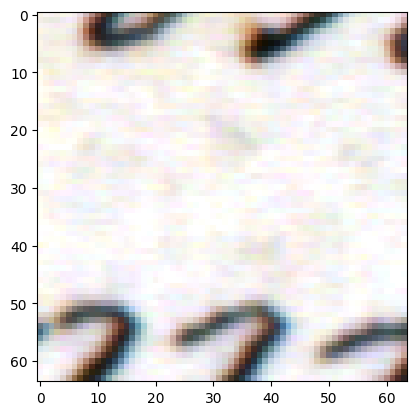

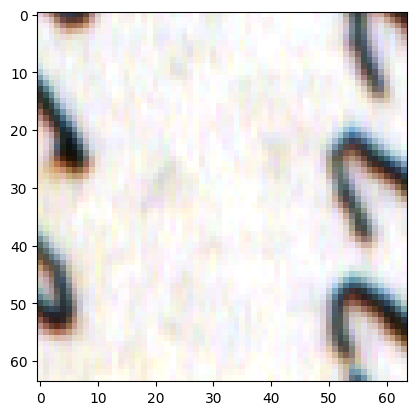

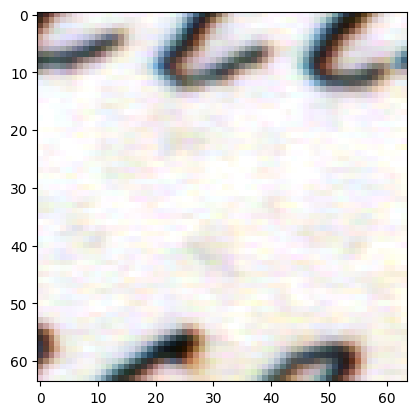

xxxxx


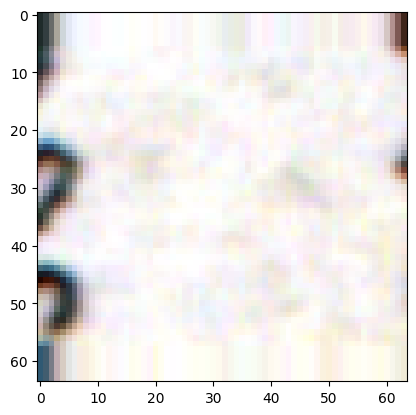

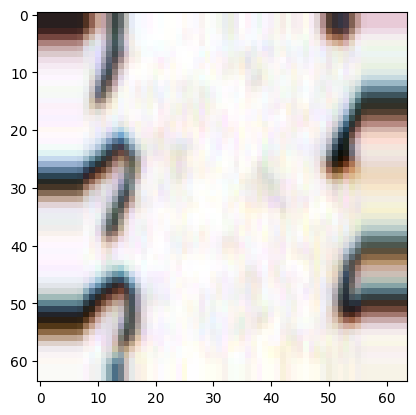

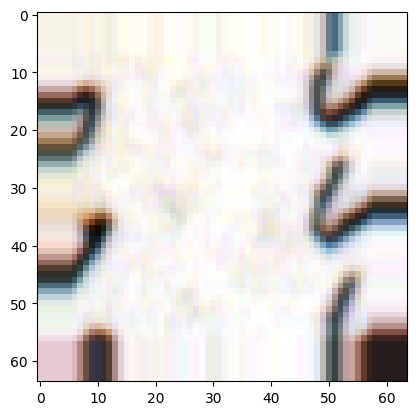

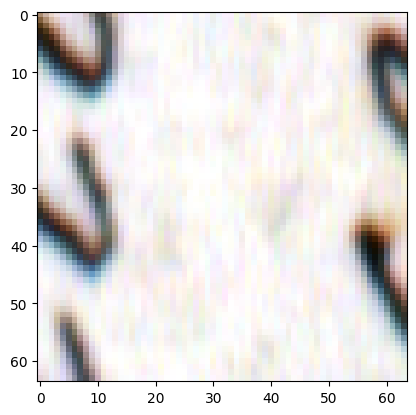

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load an example image
#img = tf.keras.preprocessing.image.load_img(file_path + "CROP_WB_ViganII_NAP.png")
#x = tf.keras.preprocessing.image.img_to_array(img)
x = train_input[375]
plt.imshow(x)
plt.show()
x = x.reshape((1,) + x.shape)


# Create an instance of the ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(
    vertical_flip=True,
    horizontal_flip=True,
    zoom_range=0.3,
)

# Generate augmented images with specific rotations
rotations = [90, 180, 270]
num_augmented_images = len(rotations)
i = 0
for angle in rotations:
    augmented_image = datagen.apply_transform(x[0], {'theta': angle})  # Apply specific rotation
    plt.figure(i)
    imgplot = plt.imshow(tf.keras.preprocessing.image.array_to_img(augmented_image))
    i += 1

plt.show()
print("xxxxx")
i = 0
for batch in datagen.flow(x, batch_size=1):
    x = tf.keras.preprocessing.image.array_to_img(batch[0])
    i += 1
    plt.figure(i)
    imgplot = plt.imshow(x)
    if i == 4:
        break

